<p>Customer Clustering (K-Meamn Cluster)</p>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Online Retail.csv")

In [5]:
df.shape

(541909, 8)

In [6]:
df.keys()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [8]:
df = df[df.Quantity > 0]

In [9]:
df.shape

(531285, 8)

In [34]:
df["Sales"] = df.Quantity.values * df.UnitPrice.values

In [35]:
df.keys()

Index([  'InvoiceNo',   'StockCode', 'Description',    'Quantity',
       'InvoiceDate',   'UnitPrice',  'CustomerID',     'Country',
             'Sales',            -1],
      dtype='object')

In [42]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/11 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/11 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/11 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/11 12:50,4.15,12680.0,France,16.60


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
 8   Sales        531285 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 60.5+ MB


In [44]:
df["InvoiceDate"] = pd.to_datetime(df.InvoiceDate)

In [48]:
## RMF - Recency, Frequency, Monetary analysis

In [49]:
## 1- Monetry Value

In [52]:
monetary = df.groupby("CustomerID").Sales.sum()
monetary = monetary.reset_index()
monetary

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [53]:
### Frequency Value

In [54]:
frequency = df.groupby("CustomerID").InvoiceNo.count()
frequency = frequency.reset_index()
frequency

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [55]:
## Recency 

In [63]:
MaxDate = max(df.InvoiceDate)

In [64]:
MaxDate

Timestamp('2011-12-10 17:19:00')

In [65]:
## Add one More Day in MaxDate to get Last Date:

In [66]:
MaxDate = MaxDate + pd.DateOffset(days = 1)

In [67]:
MaxDate

Timestamp('2011-12-11 17:19:00')

In [68]:
df["Diff"] = MaxDate - df.InvoiceDate

In [69]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,698 days 08:53:00
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,698 days 08:53:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,698 days 08:53:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,698 days 08:53:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,698 days 08:53:00


In [70]:
recency = df.groupby("CustomerID").Diff.min()
recency = recency.reset_index()
recency

,CustomerID,Diff
0,12346.0,327 days 07:18:00
1,12347.0,41 days 04:54:00
2,12348.0,77 days 04:06:00
3,12349.0,20 days 07:28:00
4,12350.0,312 days 01:18:00
...,...,...
4334,18280.0,161 days 07:27:00
4335,18281.0,5 days 06:26:00
4336,18282.0,217 days 03:44:00
4337,18283.0,11 days 04:20:00


In [71]:
## RMF Combined DataFrame

In [72]:
MF = monetary.merge(frequency, on = "CustomerID")

In [73]:
RMF = MF.merge(recency, on = "CustomerID")

In [75]:
RMF.columns = ["CustomerID", "Sales", "Frequency", "Recency"]

In [76]:
RMF

,CustomerID,Sales,Frequency,Recency
0,12346.0,77183.60,1,327 days 07:18:00
1,12347.0,4310.00,182,41 days 04:54:00
2,12348.0,1797.24,31,77 days 04:06:00
3,12349.0,1757.55,73,20 days 07:28:00
4,12350.0,334.40,17,312 days 01:18:00
...,...,...,...,...
4334,18280.0,180.60,10,161 days 07:27:00
4335,18281.0,80.82,7,5 days 06:26:00
4336,18282.0,178.05,12,217 days 03:44:00
4337,18283.0,2094.88,756,11 days 04:20:00


In [81]:
## Scalling our Data for K-Mean Algo

In [77]:
rmf = RMF.drop(["CustomerID"], axis=1)

In [79]:
rmf.Recency = rmf.Recency.dt.days

In [80]:
rmf

,Sales,Frequency,Recency
0,77183.60,1,327
1,4310.00,182,41
2,1797.24,31,77
3,1757.55,73,20
4,334.40,17,312
...,...,...,...
4334,180.60,10,161
4335,80.82,7,5
4336,178.05,12,217
4337,2094.88,756,11


In [84]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()

In [85]:
Rmf = scaller.fit_transform(rmf)

In [88]:
Rmf = pd.DataFrame(Rmf)
Rmf.columns = ["Amount", "Frequency", "Recency"]

In [90]:
#### Apply K-Mean Algo

In [91]:
from sklearn.cluster import KMeans

In [92]:
ssd = []
for n in range(1,20):
    model = KMeans(n_clusters=n, max_iter=100)
    model = model.fit(Rmf)
    ssd.append(model.inertia_)

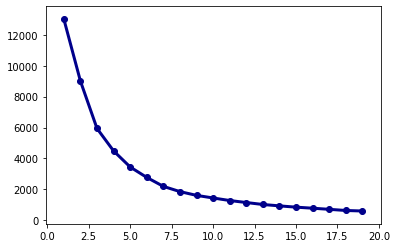

In [96]:
plt.plot(np.arange(1,20), ssd, lw = 3, c = "darkblue")
plt.scatter(np.arange(1,20), ssd, c = "darkblue")
plt.show()

In [97]:
## We are Going to Make 5 Groups 

In [98]:
model = KMeans(n_clusters=5)

In [99]:
ClusterID = model.fit_predict(Rmf)

In [100]:
ClusterID

array([3, 0, 0, ..., 2, 3, 0], dtype=int32)

In [102]:
RMF_Km = pd.concat([RMF, pd.Series(ClusterID)], axis=1)

In [104]:
RMF_Km.columns = ["CustomerID", "Sales", "Frequency", "Recency", "ClusterId"]

In [105]:
RMF_Km

,CustomerID,Sales,Frequency,Recency,ClusterId
0,12346.0,77183.60,1,327 days 07:18:00,3
1,12347.0,4310.00,182,41 days 04:54:00,0
2,12348.0,1797.24,31,77 days 04:06:00,0
3,12349.0,1757.55,73,20 days 07:28:00,0
4,12350.0,334.40,17,312 days 01:18:00,2
...,...,...,...,...,...
4334,18280.0,180.60,10,161 days 07:27:00,2
4335,18281.0,80.82,7,5 days 06:26:00,0
4336,18282.0,178.05,12,217 days 03:44:00,2
4337,18283.0,2094.88,756,11 days 04:20:00,3


In [106]:
RMF_Km.Recency = RMF_Km.Recency.dt.days

In [110]:
Km_Cluster_Sales = pd.DataFrame(RMF_Km.groupby("ClusterId").Sales.mean())
Km_Cluster_Frequency = pd.DataFrame(RMF_Km.groupby("ClusterId").Frequency.mean())
Km_Cluster_Recency = pd.DataFrame(RMF_Km.groupby("ClusterId").Recency.mean())

In [111]:
Main_Df = pd.concat([pd.Series([0,1,2,3,4]), Km_Cluster_Sales, Km_Cluster_Frequency, Km_Cluster_Recency], axis=1)
Main_Df.columns = ["ClusterId", "Sales","Frequency", "Recency" ]

In [112]:
Main_Df

,ClusterId,Sales,Frequency,Recency
0,0,1358.059570,73.475793,53.459432
1,1,70925.287500,5807.750000,5.000000
2,2,498.873392,30.731996,269.656335
3,3,12100.731899,489.253165,24.130802
4,4,190863.461667,827.833333,22.833333


In [114]:
import seaborn as sns

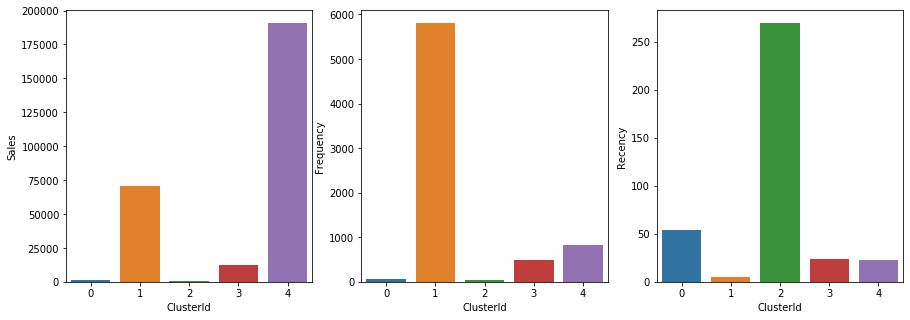

In [121]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x = Main_Df.ClusterId, y = Main_Df.Sales, ax = axs[0])
sns.barplot(x = Main_Df.ClusterId, y = Main_Df.Frequency, ax = axs[1])
sns.barplot(x = Main_Df.ClusterId, y = Main_Df.Recency, ax = axs[2])
plt.show()


<Figure size 1080x360 with 0 Axes>

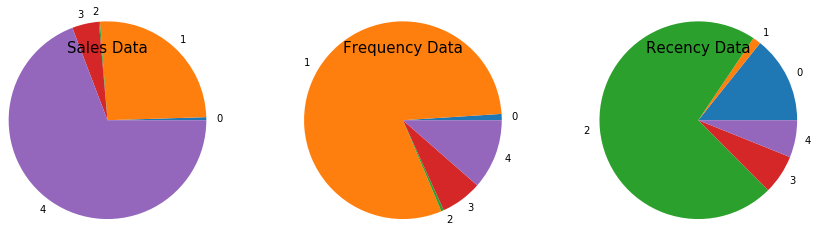

In [125]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(2, 3, 1)
plt.title("Sales Data", size = 15, color = "k")
ax.pie(Main_Df.Sales, labels = Main_Df.ClusterId, radius = 2)


ax1 = fig.add_subplot(2, 3, 2)
plt.title("Frequency Data", size = 15, color = "k")
ax1.pie(Main_Df.Frequency, labels = Main_Df.ClusterId, radius = 2)


ax2 = fig.add_subplot(2, 3, 3)
plt.title("Recency Data", size = 15, color = "k")
ax2.pie(Main_Df.Recency, labels = Main_Df.ClusterId, radius = 2)



plt.show()
